In [1]:
import matplotlib.pyplot as plt
import numpy as np
import emachine as EM
import itertools
from joblib import Parallel, delayed

In [2]:
np.random.seed(0)

In [3]:
n_var = 20

g = 0.5
n_seq = 10000

In [4]:
# Synthetic data are generated by using `generate_seq`.
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)
ops = EM.operators(seqs)
print(ops.shape)

(10000, 210)


In [5]:
# predict interactions w
eps_list = np.linspace(0.1,0.9,9)
n_eps = len(eps_list)
res = Parallel(n_jobs = n_eps)(delayed(EM.fit)(ops,eps=eps,max_iter=100) for eps in eps_list)
w_eps = np.array([res[i][0] for i in range(len(res))])
e_eps = np.array([res[i][1] for i in range(len(res))])

#e_eps = np.zeros(len(eps_list))
#w_eps = np.zeros((len(eps_list),ops.shape[1]))
#for i,eps in enumerate(eps_list):
#    w_eps[i,:],e_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
#    print('eps and e_eps:',eps,e_eps[i])

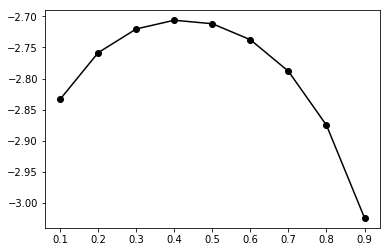

In [6]:
plt.plot(eps_list,e_eps,'ko-')

In [7]:
dw = np.zeros((len(eps_list),4))
for i,eps in enumerate(eps_list):
    w = w_eps[i]
    E = -ops.dot(w)
    P = np.exp(-E*(eps-1))
    Z_data = np.sum(P)
    P /= Z_data
        
    ops_av = np.sum(P[:,np.newaxis]*ops,axis=0)
         
    dw[i,0] = (np.abs(w - ops_av/eps)).mean()
    dw[i,1] = ((w - ops_av/eps)**2).mean()    
    dw[i,2] = (np.abs(eps*w - ops_av)).mean()
    dw[i,3] = ((eps*w - ops_av)**2).mean()

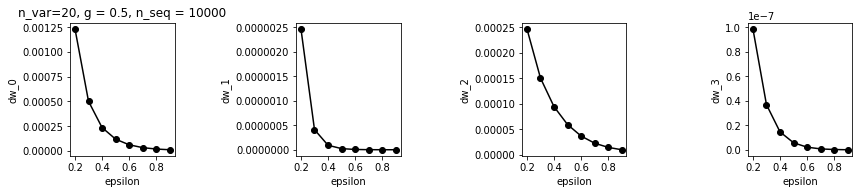

In [8]:
nx,ny = 4,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3,ny*2.8))

for i in range(nx):
    ax[i].plot(eps_list[1:],dw[1:,i],'ko-')
    ax[i].set_xlabel('epsilon')
    ax[i].set_ylabel('dw_%s'%i)
    ax[i].set_xticks([0.2,0.4,0.6,0.8])
    
ax[0].set_title('n_var=%s, g = %s, n_seq = %s'%(n_var,g,n_seq))    
   
plt.tight_layout(h_pad=0.7, w_pad=1.5)